In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pypl
import seaborn as sd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
vehi_df = pd.read_csv('vehicles.csv')

In [3]:
vehi_df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [4]:
vehi_df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [5]:
vehi_df = vehi_df[['price', 'year', 'manufacturer',
                    'condition', 'cylinders', 'fuel', 'odometer', 'title_status','drive',
                   'transmission','size', 'type', 'paint_color']]

In [6]:
vehi_cols = [cols for cols in vehi_df.columns if vehi_df[cols].dtypes == 'O']
vehi_cols

['manufacturer',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'drive',
 'transmission',
 'size',
 'type',
 'paint_color']

In [7]:
for cols in vehi_cols:
    print(vehi_df[cols].unique())

[nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'ferrari' 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury'
 'harley-davidson' 'datsun' 'aston-martin' 'land rover' 'morgan']
[nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']
[nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']
[nan 'gas' 'other' 'diesel' 'hybrid' 'electric']
[nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']
[nan 'rwd' '4wd' 'fwd']
[nan 'other' 'automatic' 'manual']
[nan 'full-size' 'mid-size' 'compact' 'sub-compact']
[nan 'pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'offroad' 'bus' 'van' 'convertible' 'wagon']
[nan 'white' 'blue' 'red' 'black' 'silver' 'grey' 'brown' 'yellow'
 '

In [8]:
vehi_df['title_status'].unique()

array([nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing',
       'parts only'], dtype=object)

In [9]:
vehi_df.title_status.unique()

array([nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing',
       'parts only'], dtype=object)

In [10]:
vehi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   title_status  418638 non-null  object 
 8   drive         296313 non-null  object 
 9   transmission  424324 non-null  object 
 10  size          120519 non-null  object 
 11  type          334022 non-null  object 
 12  paint_color   296677 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 42.3+ MB


In [11]:
vehi_df.describe()

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [12]:
sort_pr = sorted(vehi_df['price'])

q1,q3 = np.percentile(sort_pr,[10,90])

vehi_df = vehi_df[(vehi_df.price > 500.0) & (vehi_df.price < 37590.0)]

<AxesSubplot:xlabel='odometer', ylabel='price'>

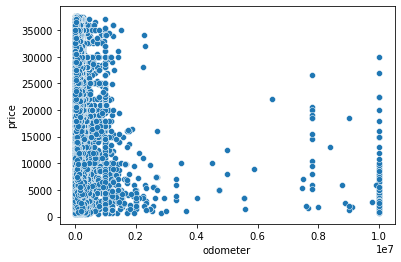

In [13]:
sd.scatterplot(x=vehi_df['odometer'],y=vehi_df['price'])

<AxesSubplot:xlabel='odometer', ylabel='price'>

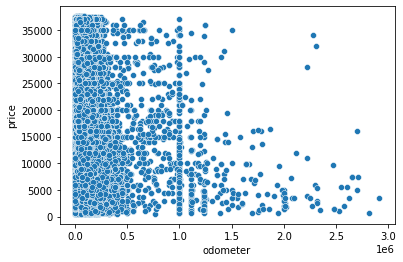

In [14]:
vehi_df['odometer'].max()

vehi_df = vehi_df[(vehi_df['odometer'] <3000000)]
sd.scatterplot(x=vehi_df['odometer'],y=vehi_df['price'])

In [15]:
vehi_df['year'] = vehi_df['year'].apply(lambda x : str(x).replace('.0',''))
vehi_df = vehi_df[vehi_df['year'] != 'nan']
vehi_df['year'] = vehi_df['year'].astype(int)

In [16]:
vehi_df = vehi_df[(vehi_df['year'] >= 1948) & (vehi_df['year'] <= 2020)]

In [17]:
null_vals = pd.DataFrame(vehi_df.isnull().sum(),columns=['null'])
null_vals['percent'] = round((null_vals['null']/len(vehi_df))*100,3)
null_vals.sort_values(by='percent',ascending=False)

,null,percent
size,236018,70.103
cylinders,134998,40.097
condition,122266,36.316
drive,103187,30.649
paint_color,97131,28.850
type,73527,21.839
manufacturer,11952,3.550
title_status,5782,1.717
fuel,1962,0.583
transmission,1285,0.382


In [18]:
def remove_null_values(vehi_df):
    
    vehi_df = vehi_df.dropna(subset=['size','manufacturer','fuel','transmission','title_status'])
    vehi_df['condition'] = vehi_df['condition'].replace({'like new':'new'})
    
    excellent_mean_odo = vehi_df[vehi_df['condition']=='excellent']['odometer'].mean()
    good_mean_odo = vehi_df[vehi_df['condition']=='good']['odometer'].mean()
    fair_mean_odo = vehi_df[vehi_df['condition']=='fair']['odometer'].mean()
    new_mean_odo = vehi_df[vehi_df['condition']=='new']['odometer'].mean()
    salvage_mean_odo = vehi_df[vehi_df['condition']=='salvage']['odometer'].mean()
    
    vehi_df.loc[vehi_df.year >= 2019, 'condition'] = vehi_df.loc[vehi_df.year >= 2019, 'condition'].fillna('new')
    vehi_df.loc[vehi_df['odometer'] <= new_mean_odo,'condition'] = vehi_df.loc[vehi_df['odometer'] <= new_mean_odo,'condition'].fillna('new')
    vehi_df.loc[((vehi_df['odometer'] > new_mean_odo) & (vehi_df['odometer'] <= good_mean_odo)) ,'condition'] = vehi_df.loc[((vehi_df['odometer'] > new_mean_odo) \
                                                                                                            & (vehi_df['odometer'] <= good_mean_odo)) ,'condition']\
                                                                                                            .fillna('good')
    vehi_df.loc[((vehi_df['odometer'] > good_mean_odo) & (vehi_df['odometer'] <= excellent_mean_odo)) ,'condition'] = vehi_df.loc[((vehi_df['odometer'] > good_mean_odo) \
                                                                                                            & (vehi_df['odometer'] <= excellent_mean_odo)) ,'condition']\
                                                                                                            .fillna('excellent')
    vehi_df.loc[((vehi_df['odometer'] > excellent_mean_odo) \
    & (vehi_df['odometer'] <= salvage_mean_odo)) ,'condition'] = vehi_df.loc[((vehi_df['odometer'] > excellent_mean_odo) \
                                                           & (vehi_df['odometer'] <= salvage_mean_odo)) ,'condition']\
                                                           .fillna('salvage')
    vehi_df.loc[((vehi_df['odometer'] > salvage_mean_odo) & (vehi_df['odometer'] <= fair_mean_odo)) ,'condition'] = vehi_df.loc[((vehi_df['odometer'] > salvage_mean_odo) \
                                                                                                            & (vehi_df['odometer'] <= fair_mean_odo)) ,'condition']\
                                                                                                            .fillna('fair')
    vehi_df.loc[vehi_df['odometer'] >= fair_mean_odo,'condition'] = vehi_df.loc[vehi_df['odometer'] >= fair_mean_odo,'condition'].fillna('fair')
    
    vehi_df['cylinders'] = vehi_df['cylinders'].fillna(method='ffill')
    vehi_df['drive'] = vehi_df['drive'].fillna(method='ffill')
    vehi_df['paint_color'] = vehi_df['paint_color'].fillna(method='ffill')
    vehi_df['type'] = vehi_df['type'].fillna(method='ffill')
    
    vehi_df = vehi_df.dropna()
    return vehi_df

In [19]:
null_vals = pd.DataFrame(vehi_df.isnull().sum(),columns=['null'])
null_vals['percent'] = round((null_vals['null']/len(vehi_df))*100,3)
null_vals.sort_values(by='percent',ascending=False)

,null,percent
size,236018,70.103
cylinders,134998,40.097
condition,122266,36.316
drive,103187,30.649
paint_color,97131,28.850
type,73527,21.839
manufacturer,11952,3.550
title_status,5782,1.717
fuel,1962,0.583
transmission,1285,0.382


In [20]:
vehi2_df = remove_null_values(vehi_df)

<ipython-input-18-573beb29ff4c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehi_df['condition'] = vehi_df['condition'].replace({'like new':'new'})
C:\Users\Clavin\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Clavin\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

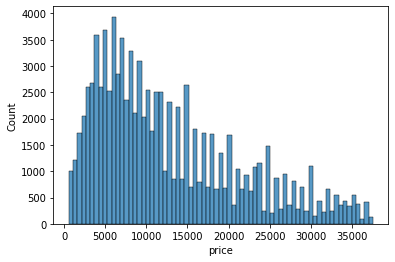

In [21]:
# pypl.hist(x=vehi_df['year'],bins=20)
sd.histplot(vehi2_df['price'])
pypl.show()

In [22]:
vehi2_df.describe()

,price,year,odometer
count,96170.000000,96170.000000,9.617000e+04
mean,12610.302735,2008.710918,1.191431e+05
std,8762.959113,9.023656,8.365787e+04
min,550.000000,1948.000000,0.000000e+00
25%,5805.250000,2006.000000,7.400000e+04
50%,9995.000000,2011.000000,1.132580e+05
75%,17900.000000,2014.000000,1.549690e+05
max,37587.000000,2020.000000,2.915272e+06


<AxesSubplot:xlabel='cylinders', ylabel='count'>

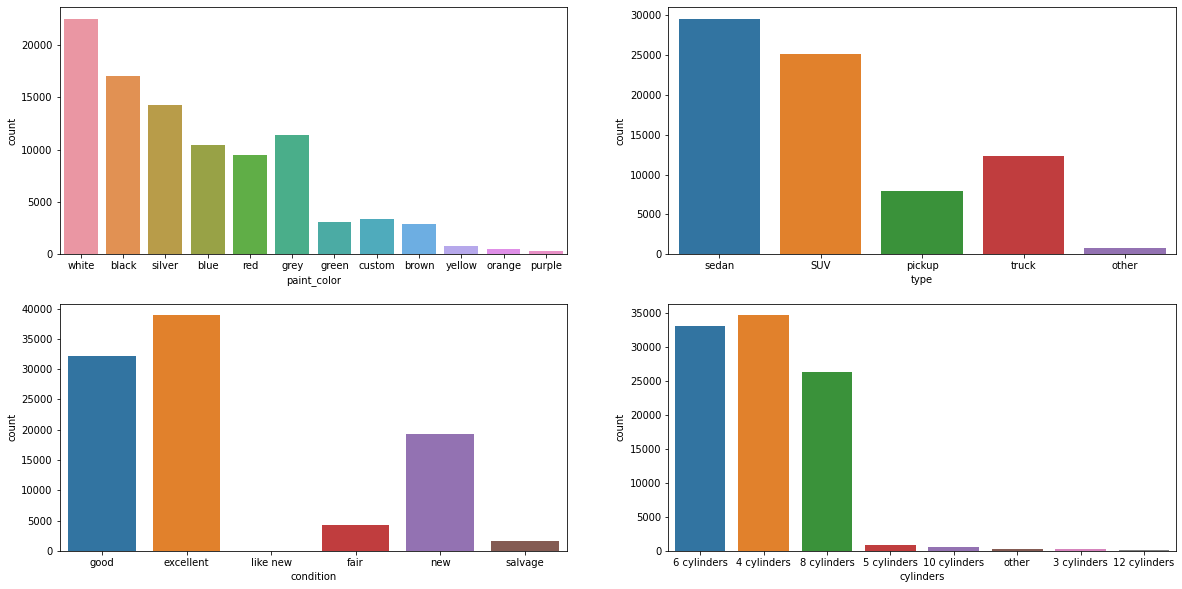

In [23]:
fig, ax = pypl.subplots(2,2,figsize=(20,10))
sd.countplot(x='paint_color',data=vehi2_df,ax=ax[0][0],order=vehi_df['paint_color'].value_counts().index)
sd.countplot(x='type',data=vehi2_df,order=vehi_df['type'].value_counts()[:5].index,ax=ax[0][1])
sd.countplot(x='condition',data=vehi2_df,ax=ax[1][0],order=vehi_df['condition'].value_counts().index)
sd.countplot(x='cylinders',data=vehi2_df,ax=ax[1][1],order=vehi_df['cylinders'].value_counts().index)

<AxesSubplot:xlabel='size', ylabel='count'>

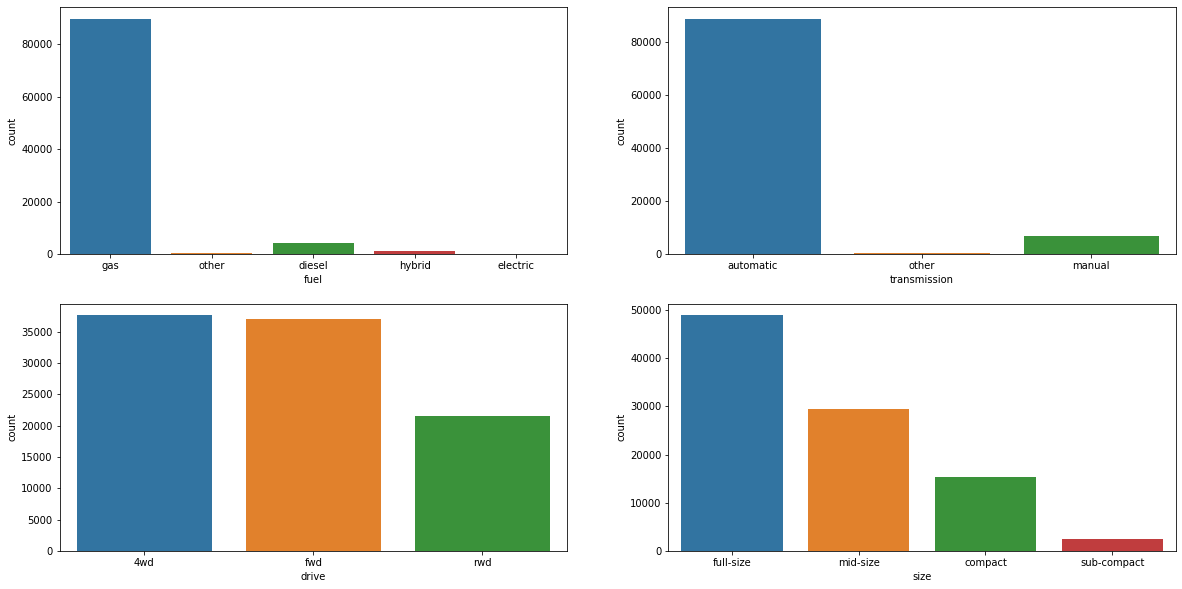

In [24]:
fig2, ax2 = pypl.subplots(2,2,figsize=(20,10))
sd.countplot(x='fuel',data=vehi2_df,ax=ax2[0][0],order=vehi_df['fuel'].value_counts().index)
sd.countplot(x='transmission',data=vehi2_df,ax=ax2[0][1],order=vehi_df['transmission'].value_counts().index)
sd.countplot(x='drive',data=vehi2_df,ax=ax2[1][0],order=vehi_df['drive'].value_counts().index)
sd.countplot(x='size',data=vehi2_df,ax=ax2[1][1],order=vehi_df['size'].value_counts().index)

<AxesSubplot:xlabel='cylinders', ylabel='price'>

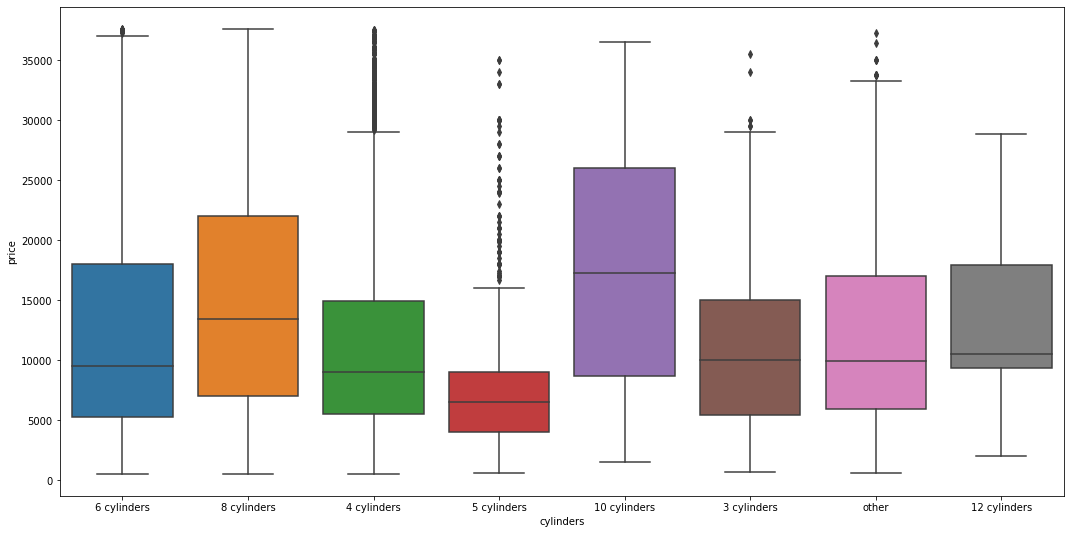

In [25]:
pypl.figure(figsize=(18,9))
sd.boxplot(x='cylinders',y='price',data=vehi2_df)

<AxesSubplot:xlabel='condition', ylabel='price'>

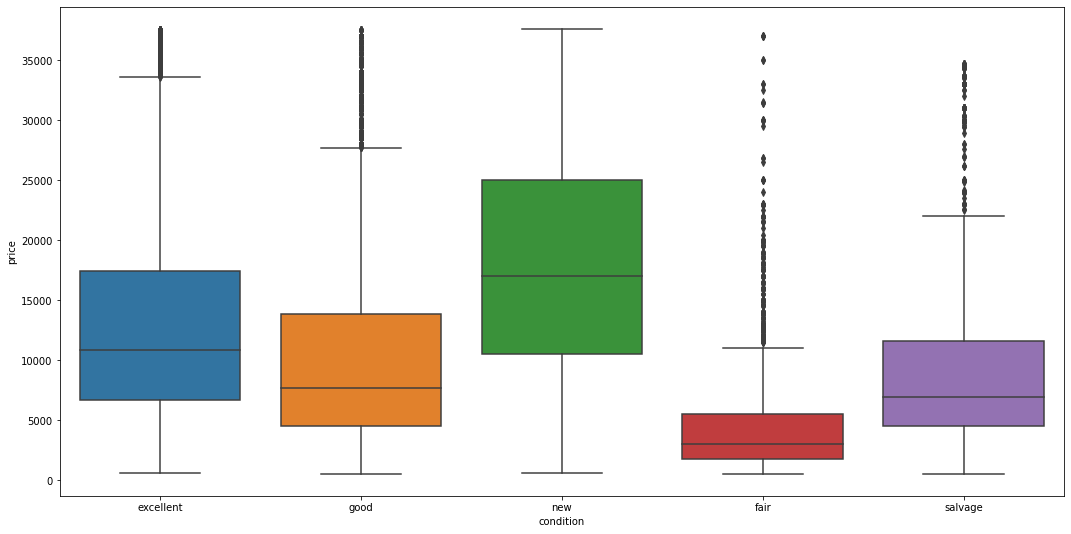

In [26]:
pypl.figure(figsize=(18,9))
sd.boxplot(x='condition',y='price',data=vehi2_df)

<AxesSubplot:xlabel='type', ylabel='price'>

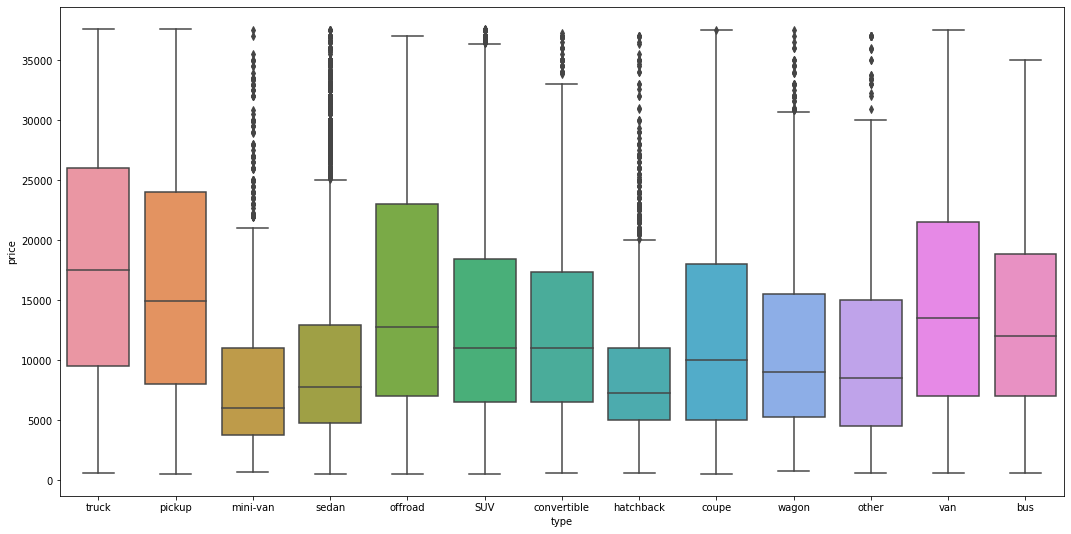

In [27]:
pypl.figure(figsize=(18,9))
sd.boxplot(x='type',y='price',data=vehi2_df)

<AxesSubplot:xlabel='size', ylabel='price'>

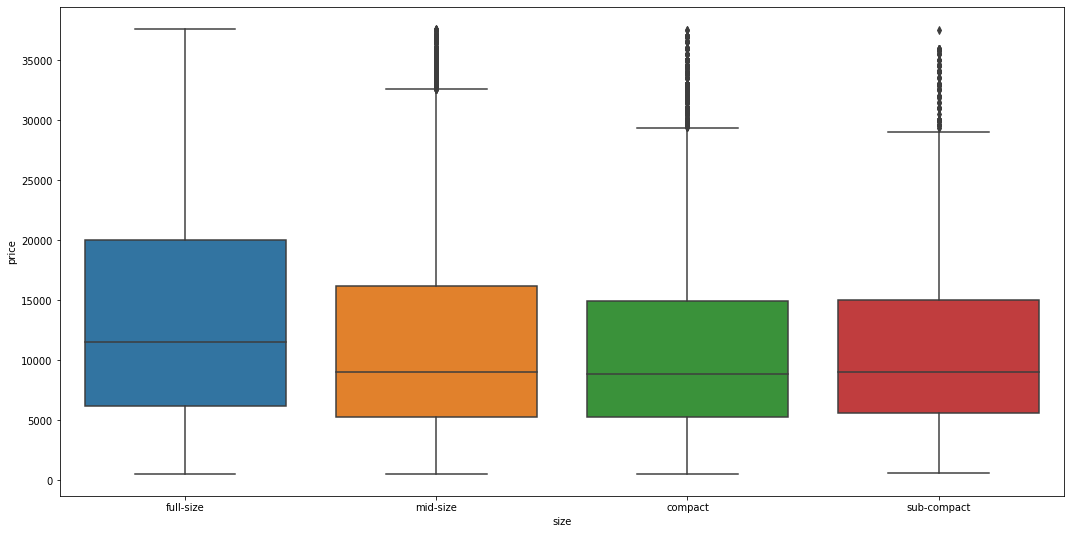

In [28]:
pypl.figure(figsize=(18,9))
sd.boxplot(x='size',y='price',data=vehi2_df)

<AxesSubplot:xlabel='fuel', ylabel='price'>

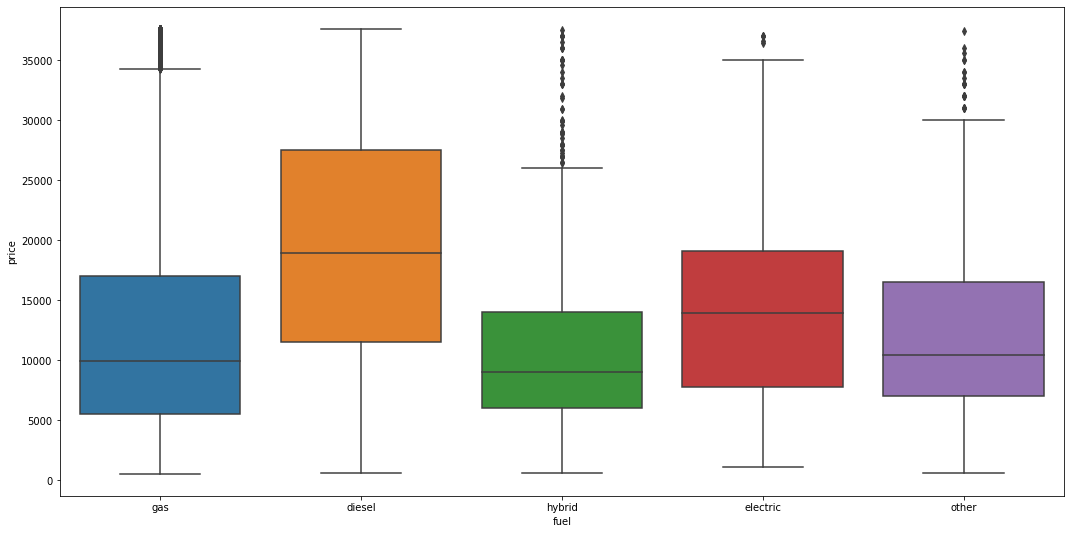

In [29]:
pypl.figure(figsize=(18,9))
sd.boxplot(x='fuel',y='price',data=vehi2_df)

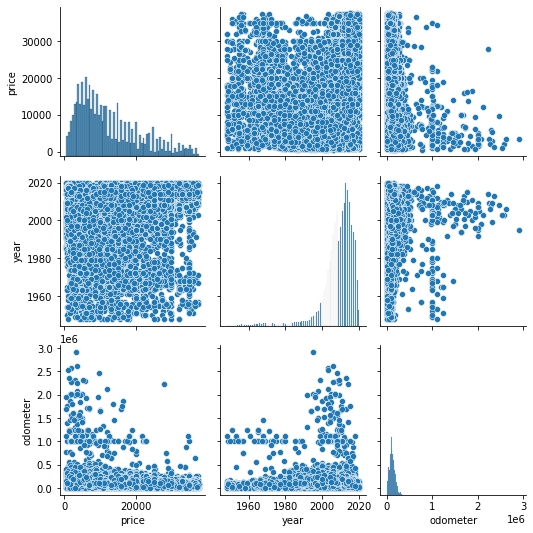

In [30]:
sd.pairplot(vehi2_df)

In [31]:
from sklearn.preprocessing import LabelEncoder

lbc = LabelEncoder()

category_cols = list(vehi2_df.dtypes[vehi2_df.dtypes == object].index)

for cols in category_cols:
    vehi2_df[cols] = lbc.fit_transform(vehi2_df[cols])

# Q1. Which car type is the cheapest and frequent

In [32]:
vehi2_df.groupby(['type'])\
       .agg(['mean','count'])['price']\
       .sort_values(by=['mean'])

,mean,count
type,,
5,8358.779981,2068
4,8773.474243,4426
9,9603.253015,29520
7,10953.081301,738
12,11038.097902,2431
3,12524.808234,5392
2,12916.391871,2608
0,13177.809675,25178
1,13596.222222,126


In [33]:
vehi2_df.groupby(['manufacturer'])\
       .agg(['mean'])['price']\
       .sort_values(by=['mean'])

,mean
manufacturer,
11,3000.000000
35,4484.259542
27,5682.127572
22,6990.000000
31,7581.560736
8,7938.839595
40,8536.721918
25,9067.037221
5,9221.594037


<AxesSubplot:>

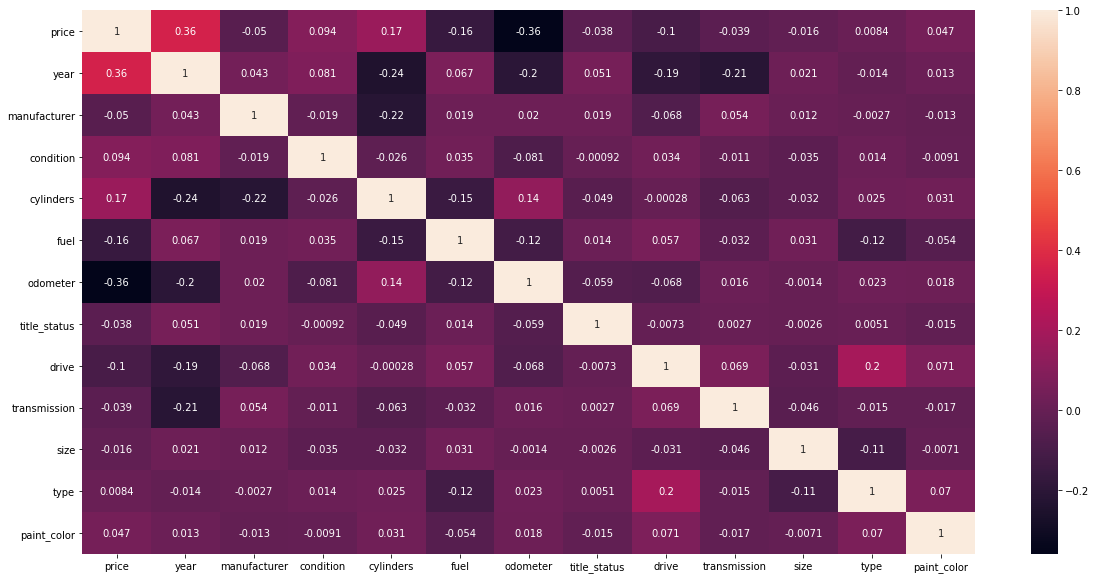

In [34]:
pypl.figure(figsize=(20,10))
corr = vehi2_df.corr()
sd.heatmap(pd.DataFrame(corr),annot=True)

### Data Preprocessing

In [35]:
Q1 = vehi_df.quantile(0.25)
Q3 = vehi_df.quantile(0.75)

IQR = Q3 - Q1

In [36]:
vehi_df = vehi_df[~((vehi_df < (Q1 - 1.5 * IQR))|(vehi_df > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-36-2b37def7e195>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  vehi_df = vehi_df[~((vehi_df < (Q1 - 1.5 * IQR))|(vehi_df > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-36-2b37def7e195>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  vehi_df = vehi_df[~((vehi_df < (Q1 - 1.5 * IQR))|(vehi_df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [37]:
ohc = OneHotEncoder(handle_unknown='ignore')
ohc.fit(vehi2_df.drop(['price'],axis=1))

def preprocess_data(vehi_df):
    
    # vehi_df = vehi_df.drop(['state'],axis=1)
    vehi_df = vehi_df[vehi_df['cylinders'] != 'other']
    vehi_df['cylinders'] = vehi_df['cylinders'].apply(lambda x : x.replace(' cylinders',''))
    # vehi_df['cylinders'] = vehi_df['cylinders'].astype(int)
    
    grades = {'excellent':5,'good':4,'fair':3,'new':2,'salvage':1}

    vehi_df['condition'] = vehi_df['condition'].replace(grades)
    
    vehi_df = pd.get_dummies(vehi_df)
    # vehi_df = vehi_df.drop(category_cols,axis=1)
    
    # vehi_df = ohc.transform(vehi_df)
    
    return vehi_df

# vehi2_df = ohc.transform(vehi2_df)
# vehi2_df.toarray()

In [38]:
vehi_df = vehi_df[vehi_df['cylinders'] != 'other']
vehi_df = remove_null_values(vehi_df)

<ipython-input-18-573beb29ff4c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehi_df['condition'] = vehi_df['condition'].replace({'like new':'new'})
C:\Users\Clavin\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Clavin\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [39]:
x = vehi_df.drop(['price'],axis=1)
y = vehi_df.price

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [40]:
x_train

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,drive,transmission,size,type,paint_color
6426,2019,buick,new,4 cylinders,gas,11695.0,clean,4wd,automatic,mid-size,SUV,white
267589,2019,buick,excellent,4 cylinders,gas,29000.0,clean,4wd,automatic,mid-size,SUV,grey
273514,2011,bmw,good,6 cylinders,gas,163000.0,clean,4wd,automatic,full-size,SUV,brown
354479,2014,nissan,good,6 cylinders,gas,106000.0,clean,fwd,automatic,mid-size,sedan,purple
189680,2012,nissan,good,4 cylinders,gas,130000.0,clean,fwd,automatic,mid-size,sedan,silver
...,...,...,...,...,...,...,...,...,...,...,...,...
328455,2010,kia,good,4 cylinders,gas,94254.0,clean,4wd,automatic,compact,coupe,silver
379642,2017,ram,good,4 cylinders,gas,89068.0,clean,fwd,automatic,mid-size,van,white
274636,2006,chrysler,excellent,6 cylinders,gas,143000.0,clean,fwd,automatic,full-size,wagon,silver
41278,2020,dodge,excellent,8 cylinders,gas,23132.0,clean,rwd,automatic,mid-size,coupe,black


In [41]:
#x_train = remove_null_values(x_train)
x_train = preprocess_data(x_train)

#x_test = remove_null_values(x_test)
x_test = preprocess_data(x_test)

In [42]:
x_train

,year,condition,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
6426,2019,2,11695.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
267589,2019,5,29000.0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
273514,2011,4,163000.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
354479,2014,4,106000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
189680,2012,4,130000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328455,2010,4,94254.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
379642,2017,4,89068.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
274636,2006,5,143000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
41278,2020,5,23132.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
x_test

,year,condition,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
270522,2007,5,171111.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
166788,2010,3,174351.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
316310,2018,5,53500.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
111370,2013,2,81830.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
379784,2016,4,132839.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27567,2016,5,129043.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
425718,2009,4,134947.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
26174,2014,4,110854.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
399960,2011,5,175000.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LassoRegression

In [45]:
from sklearn.preprocessing import StandardScaler
x_test = x_test.reindex(x_train.columns, fill_value=0,axis=1)

In [46]:
stsc = StandardScaler()
stsc.fit(x_train)
x_train = stsc.transform(x_train)
x_test = stsc.transform(x_test)

In [47]:
x_test

array([[-0.59243795,  0.93014092,  0.9643338 , ..., -0.42529507,
        -0.5558908 , -0.08164114],
       [-0.05096117, -0.80146265,  1.02103843, ..., -0.42529507,
         1.79891446, -0.08164114],
       [ 1.3929769 ,  0.93014092, -1.09402671, ..., -0.42529507,
         1.79891446, -0.08164114],
       ...,
       [ 0.67100787,  0.06433913, -0.09024978, ..., -0.42529507,
         1.79891446, -0.08164114],
       [ 0.12953109,  0.93014092,  1.03239685, ..., -0.42529507,
        -0.5558908 , -0.08164114],
       [-1.49489924,  0.93014092,  1.06645463, ..., -0.42529507,
        -0.5558908 , -0.08164114]])

In [48]:
xgbr = XGBRegressor(random_state=42,objective='reg:squarederror')
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
y_pred = xgbr.predict(x_test)
r2_score(y_test,y_pred)

0.8488942379222255

Mean Absolute Error: 2342.87 degrees.
Accuracy for xgboost is : 68.51 %.


C:\Users\Clavin\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


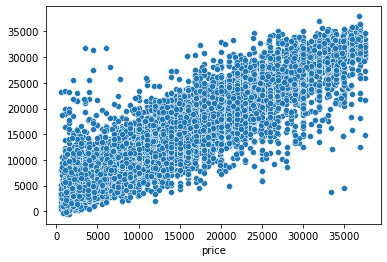

In [50]:
sd.scatterplot(y_test,y_pred)

lr_errors = abs(y_pred - y_test)

print('Mean Absolute Error:', round(np.mean(lr_errors), 2), 'degrees.')
mape = 100 * (lr_errors / y_test)

lr_accuracy = 100 - np.mean(mape)
print('Accuracy for xgboost is :', round(lr_accuracy, 2), '%.')

In [52]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [53]:
lin_pred = linreg.predict(x_test)
r2_score(y_test,lin_pred)

0.7065943527026408

Mean Absolute Error: 3549.36 degrees.
Accuracy for xgboost is : 47.26 %.


C:\Users\Clavin\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


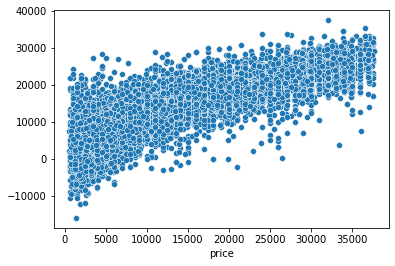

In [54]:
sd.scatterplot(y_test,lin_pred)

lr_errors = abs(lin_pred - y_test)

print('Mean Absolute Error:', round(np.mean(lr_errors), 2), 'degrees.')
mape = 100 * (lr_errors / y_test)

lr_accuracy = 100 - np.mean(mape)
print('Accuracy for xgboost is :', round(lr_accuracy, 2), '%.')

In [55]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [56]:
rfr_pred = rfr.predict(x_test)
r2_score(y_test,rfr_pred)

0.872977670191029

Mean Absolute Error: 1884.9 degrees.
Accuracy for RandomForestRegression is : 73.54 %.


C:\Users\Clavin\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


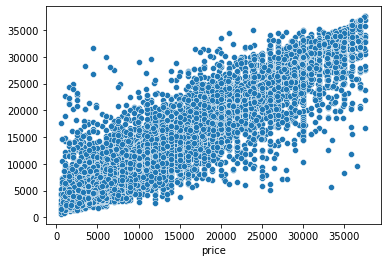

In [57]:
sd.scatterplot(y_test,rfr_pred)

lr_errors = abs(rfr_pred - y_test)

print('Mean Absolute Error:', round(np.mean(lr_errors), 2), 'degrees.')
mape = 100 * (lr_errors / y_test)

lr_accuracy = 100 - np.mean(mape)
print('Accuracy for RandomForestRegression is :', round(lr_accuracy, 2), '%.')

In [58]:
from sklearn.model_selection import cross_val_score,cross_val_predict

cv_r2_scores_ln = cross_val_score(linreg, x_train,y_train, cv=5, scoring='r2')
print(cv_r2_scores_ln)
print('Mean score : {}'.format(np.mean(cv_r2_scores_ln)))

# cv_r2_scores_ls = cross_val_score(lasso, x_train,y_train, cv=5, scoring='r2')
# print(cv_r2_scores_ls)
# print('Mean score : {}'.format(np.mean(cv_r2_scores_ls)))

cv_r2_scores_xg = cross_val_score(xgbr, x_train,y_train, cv=5, scoring='r2')
print(cv_r2_scores_xg)
print('Mean score : {}'.format(np.mean(cv_r2_scores_xg)))

cv_r2_scores_rfr = cross_val_score(rfr, x_train,y_train, cv=5, scoring='r2')
print(cv_r2_scores_rfr)
print('Mean score : {}'.format(np.mean(cv_r2_scores_rfr)))

[ 7.06082313e-01  7.05703320e-01  7.08485301e-01 -1.50287881e+25
  7.16588228e-01]
Mean score : -3.005757613949622e+24
[0.84773893 0.8450988  0.84376249 0.84538175 0.84972109]
Mean score : 0.8463406110886202
[0.86507991 0.86278662 0.86376668 0.86571347 0.86819114]
Mean score : 0.8651075626301459


In [65]:
import pickle as pk

# filename = 'carpred.sav'
# pk.dump(rfr,open(filename,'wb'))

In [66]:
filename = 'carstd.sav'
pk.dump(stsc,open(filename,'wb'))

In [61]:
# vehi_file = preprocess_data(vehi_df)
# vehi_file = vehi_file.drop(['price'],axis=1)

In [62]:
# vehi_file[:10].to_csv('nef.csv')

In [72]:
import joblib

joblib.dump(rfr,'carpred.pkl',compress=7)

['carpred.pkl']

array([11830.795     , 11897.39      , 15919.11      , ...,
       28980.88      ,  6347.55045238, 10213.44      ])